### AUTHORS
- ARCHIT- CS21BTECH11005
- JARUPULA SAI KUMAR- CS21BTECH11023

In [2]:
#import some necessary librairies
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import pickle
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


from scipy import stats

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory

In [3]:
train = pd.read_csv('./iith_foml_2023_train.csv')
test = pd.read_csv('./iith_foml_2023_test.csv')

In [6]:
train.head(5)

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24,Target Variable (Discrete)
0,1404,12,64,14,3,1,1,1,110.502,35775.200,...,NaN,NaN,15.040,104,12,2,32,1409,37677.100,1
1,909,0,235,32,1,1,1,1,-40.448,35779.400,...,2200.300,4900.005,12.030,20,1,0,13,909,25239.100,1
2,654,3,175,2,1,1,1,1,-27.445,35770.400,...,1973.300,10000.004,13.010,1,1,0,13,654,27683.500,1
3,1372,12,382,14,2,0,1,0,0.001,509.200,...,NaN,NaN,NaN,313,12,10,54,1377,39363.200,0
4,786,3,199,2,1,0,1,0,0.001,612.100,...,NaN,NaN,NaN,171,1,5,11,786,40044.400,2


In [6]:
test.head(5)

,Feature 1 (Discrete),Feature 2 (Discrete),Feature 3 (Discrete),Feature 4 (Discrete),Feature 5 (Discrete),Feature 6 (Discrete),Feature 7 (Discrete),Feature 8 (Discrete),Feature 9,Feature 10,...,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19 (Discrete),Feature 20 (Discrete),Feature 21 (Discrete),Feature 22 (Discrete),Feature 23 (Discrete),Feature 24
0,146,12,42,14,7,1,1,1,118.004,35693.500,...,4200.300,1900.100,NaN,NaN,44,12,2,42,146,37384.500
1,35,0,12,5,0,0,1,0,0.001,471.500,...,531.400,NaN,NaN,NaN,17,6,8,0,35,41465.100
2,1018,8,259,2,1,1,1,1,NaN,35774.500,...,5514.200,NaN,NaN,15.040,1,1,3,20,1018,37826.200
3,383,7,117,5,1,1,1,1,53.002,34094.100,...,3358.400,1100.200,14000.001,15.040,101,6,3,20,383,40277.300
4,1216,7,40,5,2,0,1,4,0.005,1471.300,...,225.100,NaN,NaN,3.020,276,6,7,43,1221,28419.500


## Feature Engineering

In [7]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['Target Variable (Discrete)'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Target Variable (Discrete)'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1420, 24)


In [8]:
print(all_data.dtypes)

Feature 1 (Discrete)       int64
Feature 2 (Discrete)       int64
Feature 3 (Discrete)       int64
Feature 4 (Discrete)       int64
Feature 5 (Discrete)       int64
Feature 6 (Discrete)       int64
Feature 7 (Discrete)       int64
Feature 8 (Discrete)       int64
Feature 9                float64
Feature 10               float64
Feature 11               float64
Feature 12               float64
Feature 13               float64
Feature 14               float64
Feature 15               float64
Feature 16               float64
Feature 17               float64
Feature 18               float64
Feature 19 (Discrete)      int64
Feature 20 (Discrete)      int64
Feature 21 (Discrete)      int64
Feature 22 (Discrete)      int64
Feature 23 (Discrete)      int64
Feature 24               float64
dtype: object


1     488
0     249
2     109
6      70
5      41
8       7
14      5
7       5
15      4
4       3
13      3
3       3
9       2
12      1
17      1
11      1
10      1
16      1
Name: Target Variable (Discrete), dtype: int64


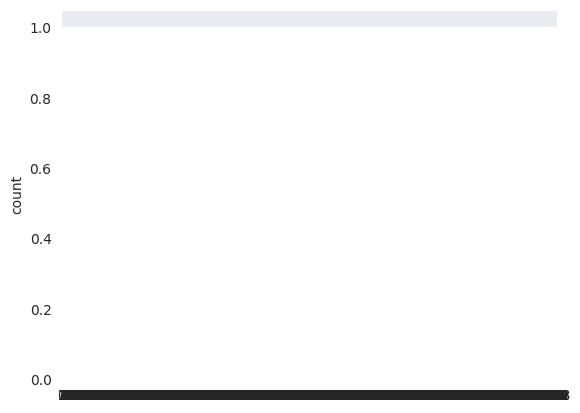

In [8]:
targets= train['Target Variable (Discrete)'].value_counts()
print(targets)
sns.countplot(train['Target Variable (Discrete)'])
plt.show()

## Missing Data

In [10]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


,Missing Ratio
Feature 16,66.761
Feature 17,54.296
Feature 18,31.268
Feature 15,7.254
Feature 9,1.268
Feature 14,0.211
Feature 10,0.070
Feature 11,0.070
Feature 12,0.070
Feature 13,0.070


Text(0.5, 1.0, 'Percent missing data by feature')

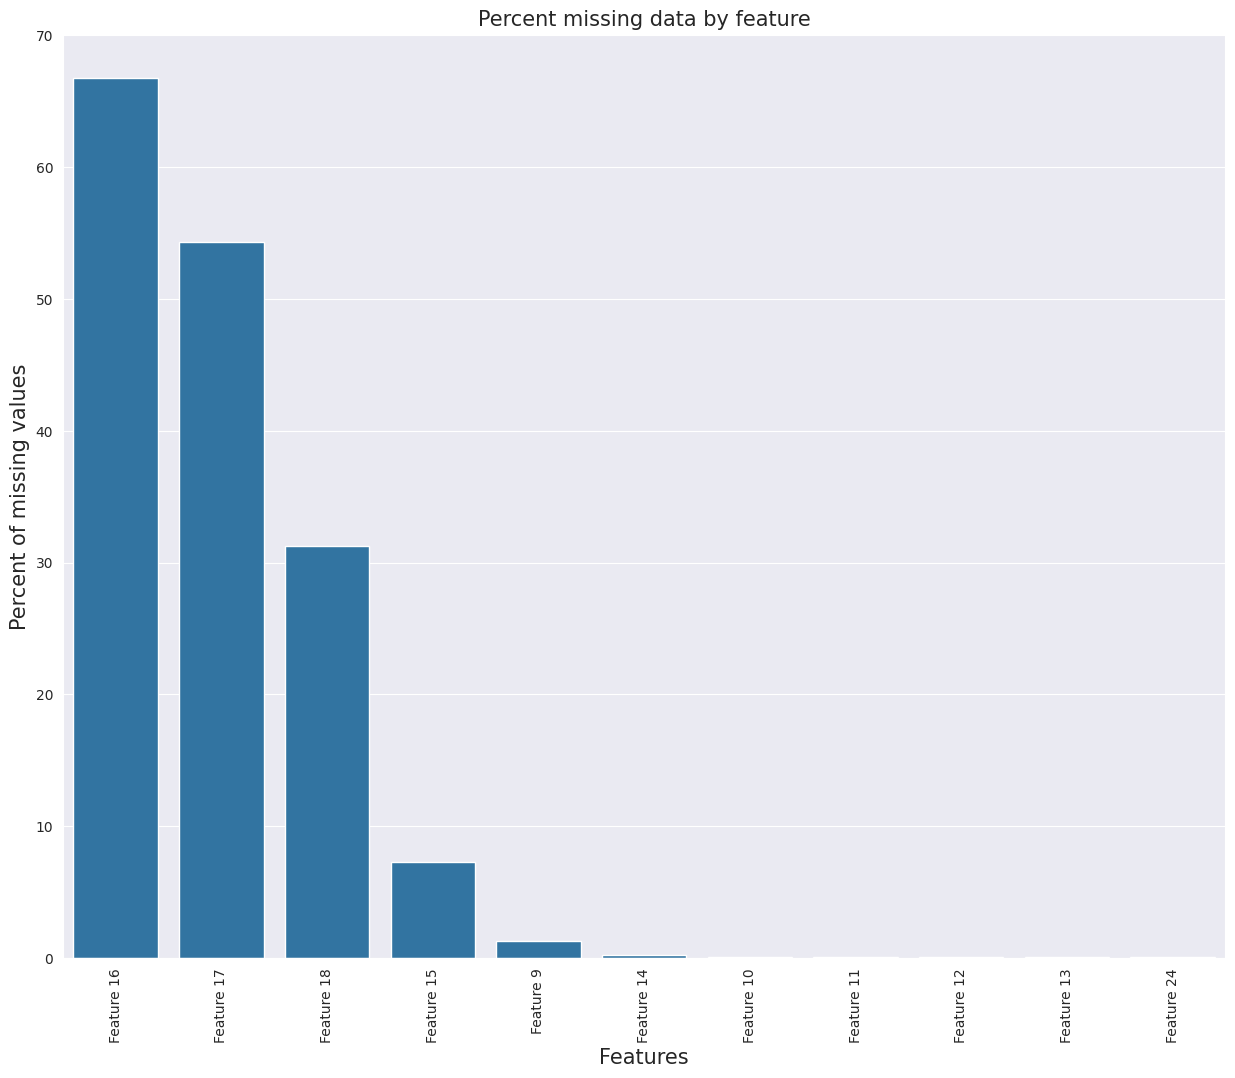

In [11]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

<AxesSubplot:>

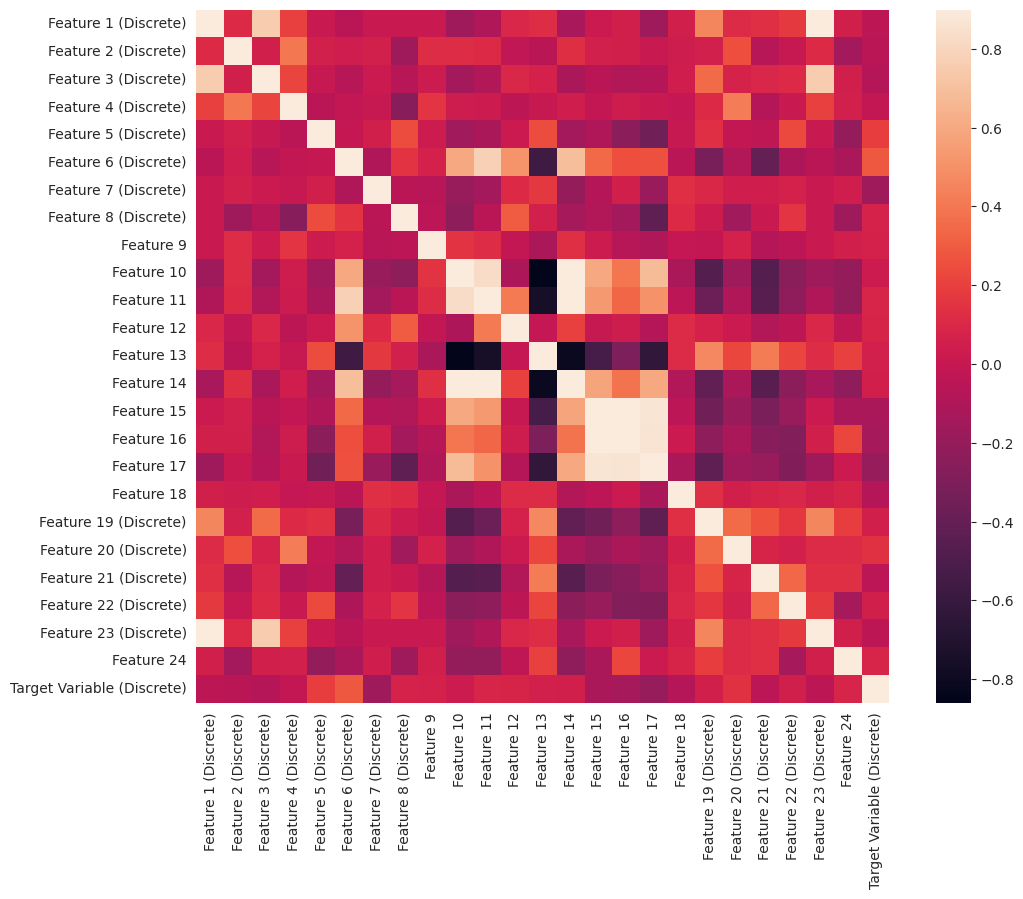

In [13]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
objects=['15','16','17','18']
for i in objects:
    all_data['Feature '+i]=all_data['Feature '+i].apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')

In [15]:
features = [14,24,13,12,11,10]
for i in features:    
    all_data['Feature '+str(i)] = all_data['Feature '+str(i)].fillna(all_data['Feature '+str(i)].mode()[0])
all_data['Feature 9']=all_data['Feature 9'].fillna(all_data['Feature 9'].mean())

In [16]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [17]:
cat_features=['5','6','7','8']
for i in cat_features:
    all_data['Feature '+i+' (Discrete)']=all_data['Feature '+i+' (Discrete)'].astype('category')

## One-hot-encoding

In [18]:
def onehotencoding(feature,data):               # Function that does onehotencoding for the given column
    features=pd.get_dummies(data[feature], prefix=feature)
    return features

In [19]:
Disc_5=onehotencoding("Feature 5 (Discrete)",all_data)
Disc_6=onehotencoding("Feature 6 (Discrete)",all_data)
Disc_7=onehotencoding("Feature 7 (Discrete)",all_data)
Disc_8=onehotencoding("Feature 8 (Discrete)",all_data)

In [20]:
features=["Feature 5 (Discrete)","Feature 6 (Discrete)","Feature 7 (Discrete)","Feature 8 (Discrete)"]
all_data.drop(features,axis=1,inplace=True)

In [21]:
all_data = pd.concat([all_data, Disc_5], axis=1)   
all_data = pd.concat([all_data, Disc_6], axis=1)  
all_data = pd.concat([all_data, Disc_7], axis=1)  
all_data = pd.concat([all_data, Disc_8], axis=1)

In [22]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Defining Models

In [2]:
import sklearn
print(sklearn.__version__)


1.3.2


In [5]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [6]:
# GBoost classifier
GBoost = GradientBoostingClassifier(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, random_state =5)

#XGB classfier
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [7]:
#XGB classfier
model_xgb = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)

In [8]:
# LGBM Classifier
model_lgb = lgb.LGBMClassifier(objective='multiclass',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


In [5]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict_proba(meta_features)

## Loading Weights

In [17]:
Gboost= "./Gboost.pkl"  
with open(Gboost, 'rb') as file:  
    Gboost_model = pickle.load(file)
GBoost_pred = Gboost_model.predict_proba(test.values)

NameError: name 'test' is not defined

In [18]:


lgb= "./Gboost.pkl"  
with open(lgb, 'rb') as file:  
    lgb_model = pickle.load(file)
lgb_pred = lgb_model.predict_proba(test.values)



NameError: name 'test' is not defined

In [ ]:
rf="../input/weights/rf.pkl"
with open(rf, 'rb') as file:  
    rf_model = pickle.load(file)
rf_pred = rf_model.predict_proba(test.values)

In [ ]:


stacked="../input/weights/stacked.pkl"
with open(stacked, 'rb') as file:  
    stacked_model = pickle.load(file)
stacked_pred = stacked_model.predict(test.values)



In [11]:
xgb="../input/weights/xgb.pkl"
with open(xgb, 'rb') as file:  
    xgb_model = pickle.load(file)
xgb_pred = xgb_model.predict_proba(test.values)

FileNotFoundError: [Errno 2] No such file or directory: '../input/weights/xgb.pkl'

In [16]:
final_prob = np.multiply(rf_pred,0.5)+np.multiply(stacked_pred,0.3)+np.multiply(xgb_pred,0.1)+np.multiply(GBoost_pred,0.05)+np.multiply(lgb_pred,0.05)
lst=[]
for i in range(len(test)):
    lst.append([i+1,np.argmax(final_prob[i])])
ensemble = pd.DataFrame(lst)
ensemble.columns=["Id","Category"]
ensemble.to_csv('submission.csv',index=False)
print(ensemble.head(5))

NameError: name 'np' is not defined